In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps, ImageDraw

In [2]:
# Reading the image and convert to grayscale
img = Image.open('me.jpg')
gray_image = ImageOps.grayscale(img)

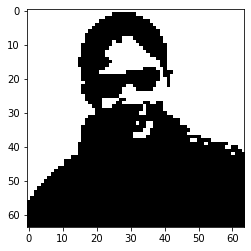

In [3]:
# Resize the image and convert the image to binary
image = gray_image.resize((64, 64), Image.ANTIALIAS)
img_np = np.asarray(image)
img_np = np.where(img_np<128, -1, 1)
plt.imshow(img_np, cmap='gray')

In [4]:
# Create a corrupted image by shuffling pixels
orig_px = image.getdata()

orig_px = np.reshape(orig_px, (image.height * image.width))
np.random.shuffle(orig_px)

orig_px = np.reshape(orig_px, (image.height, image.width))
shuff_img = Image.fromarray(orig_px.astype('uint8'))
#res.save('shuff_img.jpg')

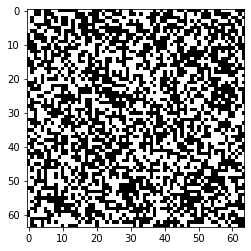

In [5]:
# Turn corrupted image to binary

#shuff_img = Image.open('shuff_img.jpg')
shuff_np = np.asarray(shuff_img)
shuff_np = np.where(shuff_np<128, -1, 1)
plt.imshow(shuff_np, cmap='gray')

In [6]:
N = img_np.shape[0]*img_np.shape[1]
print(N)

4096


In [7]:
# Create the memory vector
memory = img_np.reshape(1, N)
n = memory.shape[1]
N_sqrt = np.sqrt(n).astype('int32')
m = len(memory)
print(memory)
print(n)

[[ 1  1  1 ... -1 -1 -1]]
4096


In [8]:
# generate the weight matrix with no self connection
w = np.zeros((N,N)) 
w = (1 / memory.shape[0]) * memory.T @ memory #hebbian learning
np.fill_diagonal(w, 0)
print(w)

[[ 0.  1.  1. ... -1. -1. -1.]
 [ 1.  0.  1. ... -1. -1. -1.]
 [ 1.  1.  0. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ...  0.  1.  1.]
 [-1. -1. -1. ...  1.  0.  1.]
 [-1. -1. -1. ...  1.  1.  0.]]


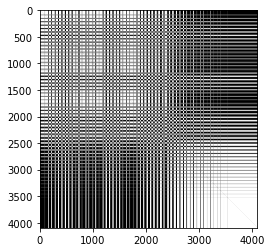

In [9]:
plt.imshow(np.where(w.reshape(N, N)<1, -1, 1), cmap='gray')

In [10]:
# Convert the corrupted image to test vector
test_array = shuff_np.reshape(1, N)
h = np.zeros((n))
print(test_array)

[[ 1  1 -1 ...  1 -1 -1]]


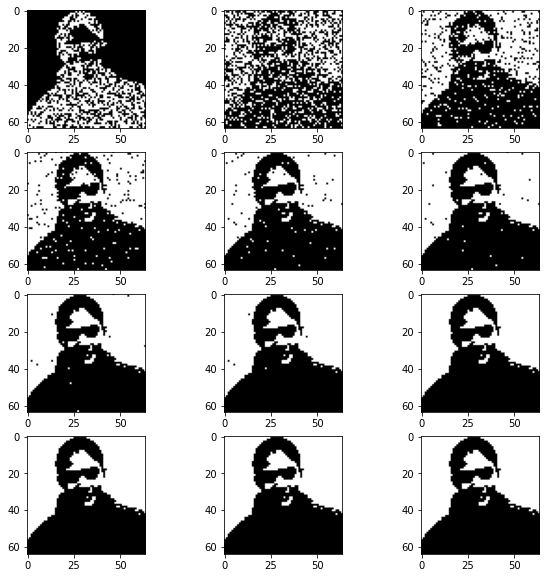

In [11]:
# Train the Hopfield network
NO_OF_ITERATIONS = 10
fig = plt.figure(figsize = (10, 10))
for iteration in range(NO_OF_ITERATIONS):
    for i in range(N):
        i = np.random.randint(N)
        h[i] = 0
        for j in range(N):
            h[i] = w[i, j]*test_array[0, j]
    test_array = (np.where(h<0, -1, 1)).reshape(1, N)

    plt.subplot(4, 3,iteration+1)
    plt.imshow(np.where(test_array.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')